# Exercise 5.04 - Training a Keras Model

Thankfully we don’t need to worry about manually programming the components of the neural network such as backpropogation as the Keras framework manages this for us.  In this exercise we will use Keras to train a neural network to classify a small subset of the CIRFAR-10 dataset, using the model architecture defined in the previous exercise.  As with all machine learning problems, the first and most important step is to understand as much about the dataset as possible, and this will form the initial focus of the exercise.

Import pickle, numpy, matplotlib as well as the *Sequential* class from **keras.models** and *Dense* from **keras.layers**.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Load the data

In [2]:
with open('data_batch_1', 'rb') as f:
    batch_1 = pickle.load(f, encoding='bytes')

The data is loaded as a dictionary.  Display the keys of the dictionary

In [3]:
batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

Notice the keys are stored as binary strings as denoted by the b' .  We are interested in the contents of data and labels.  Looking at labels first

In [4]:
labels = batch_1[b'labels']
labels

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


We can see the labels are a list of values 0 - 9 indicating which class each sample belongs to.  Now look at the contents of the data key.

In [5]:
batch_1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

The data key provides a numpy array with all of the image data stored within the array.  What is the shape of the image data?

In [6]:
batch_1[b'data'].shape

(10000, 3072)

So we can see we have 10000 samples but each sample is a single dimension of 3072 samples.  Arent the images supposed to be 32 x 32 pixels?  Yes they are, but as the images are color or RGB images they contain three channels (Red, Green, Blue), thus the images are 32 x 32 x 3.  The images are also flattened providing 3072 length vectors.  So we can reshape the array and then visualise a sample of images.  According to the CIFAR-10 documentation the first 1024 samples are red, the second 1024 green, the third blue.

In [7]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(batch_1[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

Display the first 12 images, along with their labels

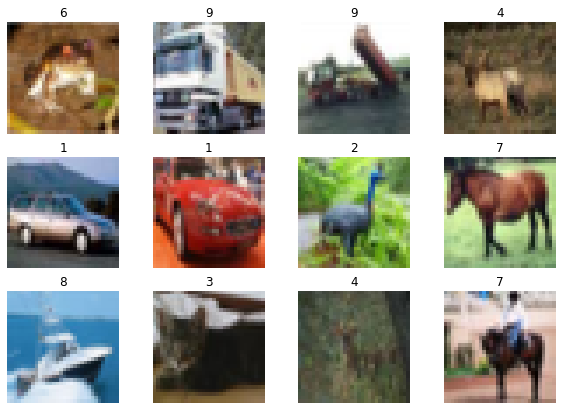

In [8]:
plt.figure(figsize=(10, 7))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

What are the actual meaning of the labels?  To find out load the batches.meta file

In [9]:
with open('batches.meta', 'rb') as f:
    label_strings = pickle.load(f, encoding='bytes')
    
label_strings

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

Decode the binary strings to get the actual labels

In [10]:
actual_labels = [label.decode() for label in label_strings[b'label_names']]
actual_labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Print the labels for the first 12 images

In [11]:
for lab in labels[:12]:
    print(actual_labels[lab], end=', ')

frog, truck, truck, deer, automobile, automobile, bird, horse, ship, cat, deer, horse, 

Now we need to prepare the data for training the model.  The first step is to prepare the output.  Currently the output is a list of numbers 0 through 9, but as per the previous model we need each sample to be represented as a vector of 10 units.  This is known as **one hot encoding** where for each sample there are as many columns as possible classes and the identified class is indicated by a 1 in the appropriate column.

In [12]:
one_hot_labels = np.zeros((images.shape[0], 10))

for idx, lab in enumerate(labels):
    one_hot_labels[idx, lab] = 1

Display the one hot encoding values for the first 12 samples

In [13]:
one_hot_labels[:12]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

The model has 1024 inputs as it expects a 32 x 32 grayscale image.  Take the average of the 3 channels for each image to convert it to RGB.

In [14]:
images = images.mean(axis=-1)

Display the first 12 images again

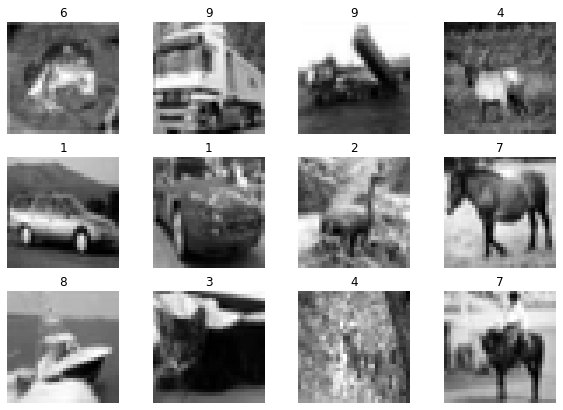

In [15]:
plt.figure(figsize=(10, 7))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

Finally, scale the images to be between 0 and 1, which is required for all inputs to a neural network.  As the maximum value in an image is 255, we will simply divide by 255.

In [16]:
images /= 255.

We also need the images to be in the shape 10000 x 1024.

In [17]:
images = images.reshape((-1, 32 ** 2))

We will select the first 7000 samples for training and the last 3000 samples for evaluating the model.

In [18]:
x_train = images[:7000]
y_train = one_hot_labels[:7000]

x_test = images[7000:]
y_test = one_hot_labels[7000:]

Re-define the model

In [18]:
model = Sequential([
    Dense(500, input_shape=(1024,), activation='relu'),
    Dense(10, activation='softmax')
    
])

Instructions for updating:
Colocations handled automatically by placer.


Now we can train the model in Keras.  We first need to compile the method to specify the training parameters.  We will be using categorical cross entropy, with stochastic gradient descent and a performance metric of classification accuracy.

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Train the model using back-propogation for 100 epochs, using the **fit** method of the model.  Use x_test and y_test as the validation score

In [20]:
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

NameError: name 'x_train' is not defined

We achieved approximately 90% classification accuracy for the 1000 samples using this network.  Examine the predictions made for the first 12 samples again.

In [ ]:
predictions = model.predict(images[:12])
predictions

We can use the argmax method to determine the most likely class for each sample

In [ ]:
np.argmax(predictions, axis=1)

Compare with the labels

In [ ]:
labels[:12]

The network made one error in these samples, classifying the second last samples as a 2 (bird) instead of a 4 (deer)